# May 13th

In [86]:
import tweepy
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from tweepy.auth import OAuthHandler

In [87]:
path = r'/home/edmundotome/Documents/Github Projects/LogAPItwitter.csv'
log = pd.read_csv(path)

In [88]:
consumerKey = log['API Key'][0]
consumerSecret = log['API Key Secret'][0]

accessToken = log['Access Token'][0]
accessTokenSecret = log['Access Token Secret'][0]

In [89]:
auth = OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [90]:
#gather 1000 tweets about Bitcoin and filter out any retweets 'RT'
search_term = '#bitcoin -filter:retweets'

#create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since='2021-05-13', tweet_mode='extended').items(1000)

#store tweets in a variable and get the full text
all_tweets = [tweet.full_text for tweet in tweets]

In [91]:
#create a dataframe to store the tweets with a column called 'tweets'
df = pd.DataFrame(all_tweets, columns=['Tweets'])
#show the first 5 rows of data
df.head(10)

,Tweets
0,@ShibInform Suni (@sunifoundation) Ecosystem i...
1,Lightning Network-Powered App Strike Launches ...
2,@WhaleRumors @ShibaArchives Suni (@sunifoundat...
3,@JeffBooth @DanPriceSeattle @Santiag78758327 F...
4,Free market is not equal to capitalism. In a f...
5,@nftdiviner New NFT! 😊👌🏼\nhttps://t.co/kxc80PP...
6,i will vote for #BBM and #Sara \n#Bitcoin #BNB...
7,I am claiming my free Lightning sats from @_bi...
8,If a competitor wanted to make the Bitcoin sys...
9,@cryptosilverlab @DanPriceSeattle @Santiag7875...


In [92]:
#create a function to clean the tweets 
def cleanTwt(twt):
  twt = re.sub('#bitcoin', 'bitcoin', twt) #removes the '#' from bitcoin
  twt = re.sub('#Bitcoin', 'Bitcoin', twt)
  twt = re.sub('#BTC', 'Bitcoin', twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt) #removes any strings with a '#'
  twt = re.sub('\\n', '', twt) #removes the '\n' string
  twt = re.sub('https?:\/\/\S+', '', twt) #removes any hyperlinks
  return twt

In [93]:
#clean the tweets
df['Cleaned Tweets'] = df['Tweets'].apply(cleanTwt)
#show the dataset
df.head()

,Tweets,Cleaned Tweets
0,@ShibInform Suni (@sunifoundation) Ecosystem i...,@ShibInform Suni (@sunifoundation) Ecosystem i...
1,Lightning Network-Powered App Strike Launches ...,Lightning Network-Powered App Strike Launches ...
2,@WhaleRumors @ShibaArchives Suni (@sunifoundat...,@WhaleRumors @ShibaArchives Suni (@sunifoundat...
3,@JeffBooth @DanPriceSeattle @Santiag78758327 F...,@JeffBooth @DanPriceSeattle @Santiag78758327 F...
4,Free market is not equal to capitalism. In a f...,Free market is not equal to capitalism. In a f...


In [94]:
#create a function to get subjetivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#create a function to get polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#create two new columns called 'Subjetivity' and 'Polarity'
df['Subjetivity'] = df['Cleaned Tweets'].apply(getSubjectivity)

df['Polarity'] = df['Cleaned Tweets'].apply(getPolarity)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity
0,@ShibInform Suni (@sunifoundation) Ecosystem i...,@ShibInform Suni (@sunifoundation) Ecosystem i...,0.333333,0.250000
1,Lightning Network-Powered App Strike Launches ...,Lightning Network-Powered App Strike Launches ...,0.142857,-0.071429
2,@WhaleRumors @ShibaArchives Suni (@sunifoundat...,@WhaleRumors @ShibaArchives Suni (@sunifoundat...,0.333333,0.250000
3,@JeffBooth @DanPriceSeattle @Santiag78758327 F...,@JeffBooth @DanPriceSeattle @Santiag78758327 F...,0.000000,0.000000
4,Free market is not equal to capitalism. In a f...,Free market is not equal to capitalism. In a f...,0.587500,0.325000
5,@nftdiviner New NFT! 😊👌🏼\nhttps://t.co/kxc80PP...,@nftdiviner New NFT! 😊👌🏼 bitcoin ...,0.454545,0.170455
6,i will vote for #BBM and #Sara \n#Bitcoin #BNB...,i will vote for and Bitcoin,0.000000,0.000000
7,I am claiming my free Lightning sats from @_bi...,I am claiming my free Lightning sats from @_bi...,0.850000,0.575000
8,If a competitor wanted to make the Bitcoin sys...,If a competitor wanted to make the Bitcoin sys...,0.400000,0.000000
9,@cryptosilverlab @DanPriceSeattle @Santiag7875...,@cryptosilverlab @DanPriceSeattle @Santiag7875...,0.562500,0.375000


In [95]:
#create a function to get sentiment text 
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


In [96]:
#create a column to store the text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity,Sentiment
0,@ShibInform Suni (@sunifoundation) Ecosystem i...,@ShibInform Suni (@sunifoundation) Ecosystem i...,0.333333,0.250000,Positive
1,Lightning Network-Powered App Strike Launches ...,Lightning Network-Powered App Strike Launches ...,0.142857,-0.071429,Negative
2,@WhaleRumors @ShibaArchives Suni (@sunifoundat...,@WhaleRumors @ShibaArchives Suni (@sunifoundat...,0.333333,0.250000,Positive
3,@JeffBooth @DanPriceSeattle @Santiag78758327 F...,@JeffBooth @DanPriceSeattle @Santiag78758327 F...,0.000000,0.000000,Neutral
4,Free market is not equal to capitalism. In a f...,Free market is not equal to capitalism. In a f...,0.587500,0.325000,Positive
5,@nftdiviner New NFT! 😊👌🏼\nhttps://t.co/kxc80PP...,@nftdiviner New NFT! 😊👌🏼 bitcoin ...,0.454545,0.170455,Positive
6,i will vote for #BBM and #Sara \n#Bitcoin #BNB...,i will vote for and Bitcoin,0.000000,0.000000,Neutral
7,I am claiming my free Lightning sats from @_bi...,I am claiming my free Lightning sats from @_bi...,0.850000,0.575000,Positive
8,If a competitor wanted to make the Bitcoin sys...,If a competitor wanted to make the Bitcoin sys...,0.400000,0.000000,Neutral
9,@cryptosilverlab @DanPriceSeattle @Santiag7875...,@cryptosilverlab @DanPriceSeattle @Santiag7875...,0.562500,0.375000,Positive


/home/edmundotome/anaconda3/envs/Signal-Processing/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


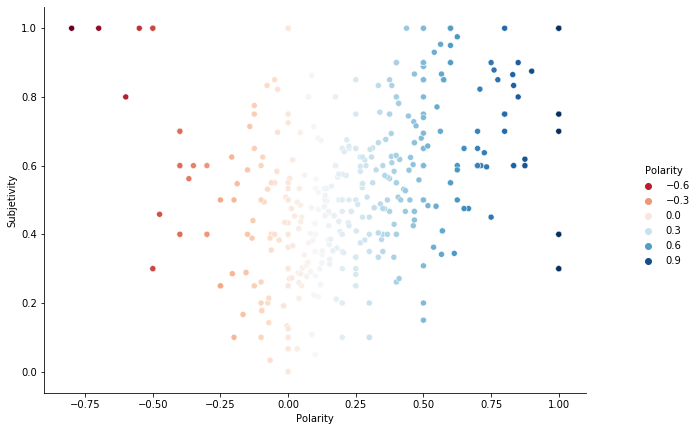

In [97]:
ax = sns.relplot(df['Polarity'], df['Subjetivity'], hue = df['Polarity'], palette='RdBu')
ax.fig.set_size_inches(10,6)

norm = plt.Normalize(df['Polarity'].min(), df['Polarity'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])

plt.show()

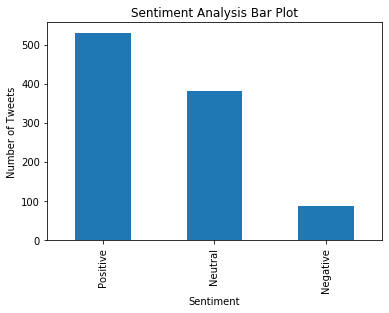

In [98]:
#create a barchar to show the count of positive, neutral and negative sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [99]:
df['Sentiment'].value_counts()

Positive    530
Neutral     382
Negative     88
Name: Sentiment, dtype: int64

In [100]:
lst_df = list(df['Sentiment'].value_counts())
lst_df

[530, 382, 88]

In [101]:
dfs = pd.read_csv("f_sentiments.csv")
  
# updating the column value/data
dfs.loc[3, 'Sentiment'] = 'day 4'
dfs.loc[3, 'Positive'] = lst_df[0]
dfs.loc[3, 'Neutral'] = lst_df[1]
dfs.loc[3, 'Negative'] = lst_df[2]
  
# writing into the file
dfs.to_csv("f_sentiments.csv", index=False)
  
print(dfs)

  Sentiment  Positive  Neutral  Negative
0     day 1     540.0    414.0      46.0
1     day 2     542.0    412.0      46.0
2     day 3     578.0    377.0      45.0
3     day 4     530.0    382.0      88.0
4     day 5     601.0    351.0      48.0
5     day 6     603.0    348.0      49.0


In [102]:
#424 314 58
#723#801